### Load the data from Excel

In [3]:
import pandas as pd
import numpy as np
import cmdstanpy as c
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from sklearn import tree
#c.install_cmdstan()
print(c.__version__)

1.1.0


In [4]:

f = pd.ExcelFile( "../data/Cumexp_development_14.04.2023.xlsx")                                                  
print(f.sheet_names)
dfs = {}
for sheet_name in f.sheet_names:
    dfs[sheet_name] = pd.read_excel(f, sheet_name, header=0,usecols=[0,1,2,3,4,5,6,7,8])

['Cumexp_development_14.04.2023']


In [9]:
dev = dfs['Cumexp_development_14.04.2023']
print(dev)
aix = dev[["BlastocystD8","Aixpansion"]].dropna()
aix1 = aix[aix["BlastocystD8"]==1]
aix0 = aix[aix["BlastocystD8"]==0]
print(aix1.shape[0])
print(aix0.shape[0])

     oocyte  Cumulus parameter  Oocyte parameter  Cleavage48h  BlastocystD8   
0      1.15                  1                 2          1.0             1  \
1      1.17                  1                 1          0.0             0   
2      1.30                  1                 2          0.0             0   
3      1.40                  1                 2          0.0             0   
4      1.50                  1                 1          1.0             0   
..      ...                ...               ...          ...           ...   
422   74.20                  1                 2          0.0             0   
423   74.50                  1                 1          1.0             1   
424   74.70                  1                 2          0.0             1   
425   74.80                  1                 2          0.0             0   
426   74.90                  1                 1          1.0             0   

     Aixpansion    Area  Distances  Score  
0      

## We run a Mann-Whitney-U significance test. 
### We try to see if we can differentiate the embryos that developed into blastocyst based on the "Aixpansion", "Area", "Distances" and "Score" values.
### We do the same for the cleavage

In [25]:

blasto0 = dev[dev["BlastocystD8"]==0]
blasto1 = dev[dev["BlastocystD8"]==1]
print("0",blasto0.shape[0])
print("1",blasto1.shape[0])

0 309
1 118


In [26]:
cleav0 = dev[dev["Cleavage48h"]==0]
cleav1 = dev[dev["Cleavage48h"]==1]

print("0",cleav0.shape[0])
print("1",cleav1.shape[0])

0 89
1 284


In [37]:
def do_the_tests(dev0,dev1):
    from scipy.stats import mannwhitneyu
    for method in ["Aixpansion","Area","Distances","Score"]:
        print(method, mannwhitneyu(dev0[method], dev1[method], alternative="less"))

In [38]:
do_the_tests(blasto0,blasto1)

Aixpansion MannwhitneyuResult(statistic=15601.0, pvalue=0.01056087998863517)
Area MannwhitneyuResult(statistic=15967.0, pvalue=0.02358022885229582)
Distances MannwhitneyuResult(statistic=16307.5, pvalue=0.04587164195294829)
Score MannwhitneyuResult(statistic=17524.5, pvalue=0.25628817881060345)


In [39]:
do_the_tests(cleav0,cleav1)

Aixpansion MannwhitneyuResult(statistic=13721.5, pvalue=0.8890179107086091)
Area MannwhitneyuResult(statistic=13411.5, pvalue=0.8084096264156134)
Distances MannwhitneyuResult(statistic=13551.0, pvalue=0.848312394352416)
Score MannwhitneyuResult(statistic=13153.5, pvalue=0.7303431879319782)


In [40]:
cleav1b0=cleav1[cleav1["BlastocystD8"]==0]
cleav1b1=cleav1[cleav1["BlastocystD8"]==1]
print("0",cleav1b0.shape[0])
print("1",cleav1b1.shape[0])

0 188
1 96


In [41]:
do_the_tests(cleav1b0,cleav1b1)

Aixpansion MannwhitneyuResult(statistic=7353.5, pvalue=0.005374352815082747)
Area MannwhitneyuResult(statistic=7831.5, pvalue=0.03432888683882317)
Distances MannwhitneyuResult(statistic=8332.0, pvalue=0.14543860692823724)
Score MannwhitneyuResult(statistic=8472.5, pvalue=0.18737402697558664)


## Long message short: 
1. The differences in the values computed by Aixpansion, Area, and Distances between blastocysts and non-blastocysts are statistically significant.
2. For those oocytes who reached cleavage, the differences in the values computed by Aixpansion and Area between blastocysts and non-blastocysts are statistically significant. This is specially try for Aixpansion which reaches a really low p-value
### Next, we unsuccessfully try to use several methods to improve the AUC of the prediction. This is not worthy looking at

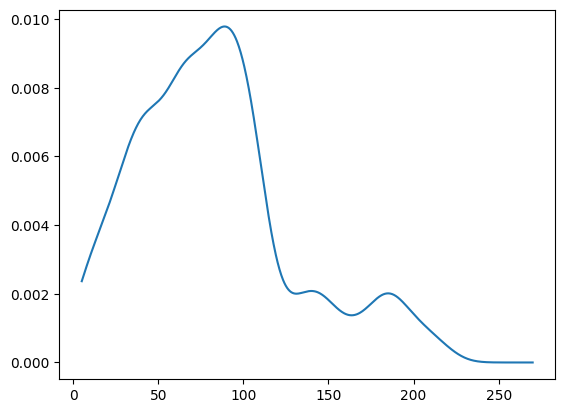

In [95]:
from sklearn.neighbors import KernelDensity



aix1np = aix1["Aixpansion"].to_numpy()
aix1np.shape = (aix1.shape[0],1)
kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(aix1np)
X_plot = np.linspace(5, 270, 1000)[:, None]
samples = np.exp(kde.score_samples(X_plot))
plt.plot(X_plot, samples)

In [ ]:

sns.kdeplot(dev1["Aixpansion"])
sns.kdeplot(dev0["Aixpansion"])

<Axes: xlabel='Area', ylabel='Density'>

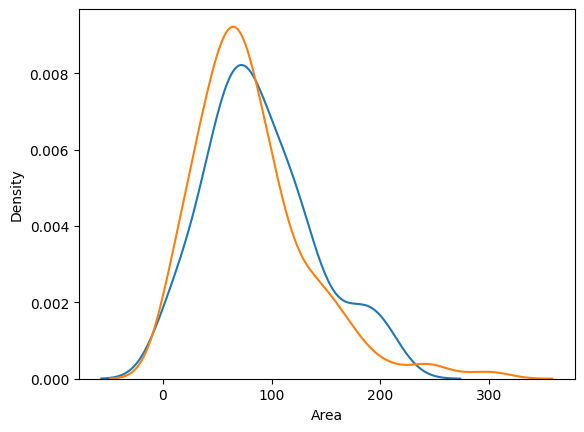

In [67]:
sns.kdeplot(dev1["Area"])
sns.kdeplot(dev0["Area"])

<Axes: xlabel='Distances', ylabel='Density'>

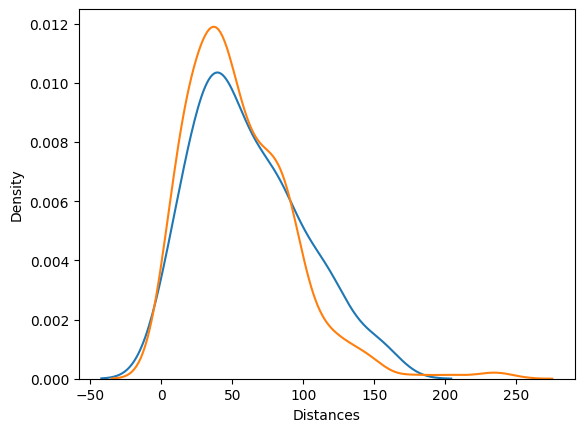

In [68]:
sns.kdeplot(dev1["Distances"])
sns.kdeplot(dev0["Distances"])

<Axes: xlabel='Score', ylabel='Density'>

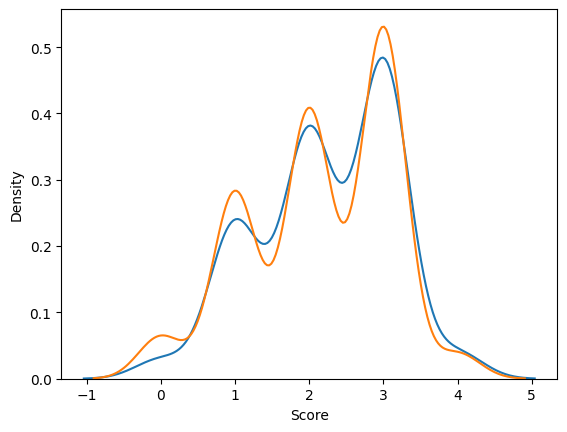

In [69]:
sns.kdeplot(dev1["Score"])
sns.kdeplot(dev0["Score"])

In [36]:
X=dev[["Aixpansion"]].to_numpy()
#X.shape=(1,len(X))
print(X)
y=dev["BlastocystD8"].to_numpy()

[[ 22.99]
 [104.98]
 [ 67.29]
 [179.42]
 [ 95.46]
 [ 42.21]
 [ 93.81]
 [ 69.09]
 [ 53.46]
 [ 53.24]
 [ 90.84]
 [  6.73]
 [ 39.89]
 [160.77]
 [ 63.58]
 [ 27.87]
 [ 65.94]
 [100.42]
 [ 99.78]
 [120.13]
 [ 64.75]
 [ 65.59]
 [139.47]
 [ 76.26]
 [ 24.75]
 [ 34.23]
 [ 37.17]
 [ 41.31]
 [ 42.26]
 [ 39.65]
 [104.52]
 [ 47.37]
 [ 79.65]
 [ 82.74]
 [ 84.21]
 [ 64.96]
 [116.13]
 [215.8 ]
 [ 33.92]
 [ 79.63]
 [ 84.69]
 [ 63.22]
 [ 36.41]
 [ 35.11]
 [ 47.04]
 [ 27.78]
 [ 25.14]
 [ 63.51]
 [ 69.81]
 [ 56.96]
 [ 62.18]
 [ 82.94]
 [ 79.13]
 [ 48.52]
 [ 35.93]
 [175.4 ]
 [ 42.2 ]
 [ 36.77]
 [ 56.08]
 [ 73.97]
 [172.78]
 [ 59.45]
 [106.72]
 [ 61.22]
 [ 53.71]
 [153.86]
 [ 76.96]
 [ 53.72]
 [ 35.16]
 [167.21]
 [ 64.06]
 [ 74.83]
 [ 66.64]
 [106.12]
 [ 64.73]
 [ 96.44]
 [ 96.85]
 [ 97.28]
 [ 22.02]
 [104.06]
 [ 55.52]
 [ 95.12]
 [ 60.24]
 [ 72.31]
 [ 17.75]
 [129.43]
 [ 63.94]
 [148.67]
 [ 96.06]
 [144.85]
 [ 16.87]
 [ 45.09]
 [ 87.19]
 [120.75]
 [ 89.94]
 [ 84.51]
 [188.69]
 [104.19]
 [ 20.92]
 [ 74.88]


In [78]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

kf = KFold(n_splits=2, shuffle=True)
for train, test in kf.split(X):
    Xtrain = X[train]
    Xtest = X[test]
    ytrain = y[train]
    ytest = y[test]
    dtc = tree.DecisionTreeClassifier(min_samples_split=20, max_leaf_nodes=2, criterion="entropy")
    dtc.fit(Xtrain, ytrain)
    #tree.plot_tree(dtc)
    plt.show()
    print(dtc)
    #y_pred = dtc.predict_proba(Xtest)[:,1]+(1./1000)*Xtest[:,0]
    y_pred = (Xtest[:,0]<90)*(1./1000)*Xtest[:,0]+\
             (np.logical_and((Xtest[:,0]>90),(Xtest[:,0]<220)))*(4500-(Xtest[:,0]-155)**2)-\
             (Xtest[:,0]>220)*(1./1000)*Xtest[:,0]
    print(y_pred)
    sc = roc_auc_score(ytest,y_pred)
    print(sc)
    #print("%s %s" % (train, test))

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=2,
                       min_samples_split=20)
[ 1.9979996e+03  9.5498840e+02  4.2210000e-02  7.5578390e+02
  5.3460000e-02  5.3240000e-02  3.8349440e+02  6.7300000e-03
  3.9890000e-02  4.4667071e+03  6.3580000e-02  6.4750000e-02
  6.5590000e-02  3.4230000e-02  3.7170000e-02  4.2260000e-02
  3.9650000e-02  4.7370000e-02  7.9650000e-02  8.2740000e-02
  6.4960000e-02  2.5140000e-02  6.3510000e-02  6.2180000e-02
  8.2940000e-02  7.9130000e-02  4.8520000e-02  4.0838400e+03
  4.2200000e-02  3.6770000e-02  4.1838716e+03  5.3710000e-02
  4.4987004e+03  5.3720000e-02  4.3509159e+03  6.4060000e-02
  7.4830000e-02  6.6640000e-02  1.0707264e+03  2.2020000e-02
  5.5520000e-02  7.2310000e-02  4.4599311e+03  1.0260764e+03
  4.3969775e+03  8.7190000e-02  3.3269375e+03  3.3649839e+03
  1.9183439e+03  7.4880000e-02  1.8938975e+03  4.7917190e+02
  3.9250000e-02  7.2510000e-02  1.0810000e-02  4.1909436e+03
  6.8430000e-02  1.3606391e+03  6.67700

DecisionTreeClassifier(min_samples_split=20)

In [39]:
dtc.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,